In [1]:
from collections import defaultdict
import pandas as pd
import pyrsm as rsm
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
from matplotlib import cm
import seaborn as sns

In [2]:
%pip install google-api-python-client

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.1 MB 11.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.5/12.1 MB 18.6 MB/s eta 0:00:01
   --------------------------- ------------ 8.4/12.1 MB 16.3 MB/s eta 0:00:01
   ----------------------------------- ---- 10.7/12.1 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing functions from the package:

from utils import functions_yt as yt
from utils import config

## DATA EXTRACTION

In [4]:
# Setting up the API:

# API client library
import googleapiclient.discovery
# API information
api_service_name = "youtube"
api_version = "v3"
# API key
DEVELOPER_KEY = config.key1
# API client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey = DEVELOPER_KEY)

In [5]:
# Obtaining all channel ids from the seeds:

seeds = ['UCgjhed4ZWlmC25hS4Sgs7gw',
              'UC_eAIxEDrIZYVWWdKsg_sqQ',
              'UCe76QcczhT2M82M-V1nEIUQ',
              'UCRRfSRlDq2ma7xp_8HYvYeA',
              'UC5Bnfg0KYC9cxlx8VlrlPuA',
              'UC1gcUuLhyMCBkZSO-SeJVQg',
              'UCg187VQ-GhEuZoAkiX8rfhw',
              'UClBzs_otOTThoS-fIYr6woA',
              'UCBPt0tyZbcOSiKQxOZKkbpg',
              'UCsN4-ME2eHj6mpBgCcFwV-w']

In [6]:
# Extracting channel information (1st layer)

df_channels = yt.get_channel_info(seeds, youtube)
df_channels.head()

,ch_id,ch_title,ch_description,ch_created,ch_country,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UCg187VQ-GhEuZoAkiX8rfhw,ZywOo,・Counter-Strike Professional Player for Team V...,2019-10-11T05:10:05.567744Z,None,5064530,92200,286
1,UC_eAIxEDrIZYVWWdKsg_sqQ,apEX,► Professional Counter-Strike player for Team ...,2018-01-04T13:19:25Z,None,1886625,29000,154
2,UClBzs_otOTThoS-fIYr6woA,Jactroll,CZÓŁKO!\n\nJestem supportem w Vitality.Bee w l...,2015-10-13T06:49:04Z,None,1803968,24300,76
3,UCsN4-ME2eHj6mpBgCcFwV-w,czajek,,2014-10-06T19:06:42Z,None,27110,370,15
4,UCRRfSRlDq2ma7xp_8HYvYeA,YamatoCannon,Email: Yamatocannon@surge.management,2008-04-06T17:30:33Z,None,23799680,87800,1456


In [7]:
# Extracting videos information (1st layer)

df_videos = yt.get_videos_info(seeds, youtube)
df_videos.head()

Total number of channels: 10
Total number of videos: 231


c:\Users\PaarthSharma\.vscode\E-Sport-scapper\utils\functions_yt.py:185: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_videos['vid_viewCount'].fillna(0, inplace=True)
c:\Users\PaarthSharma\.vscode\E-Sport-scapper\utils\functions_yt.py:186: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,vid_id,ch_id,vid_title,vid_description,vid_published,vid_viewCount,vid_likeCount,vid_commentCount
0,IqRiDBGCmb4,UCRRfSRlDq2ma7xp_8HYvYeA,130% Gold efficiency,► YamatoCannon's Cameo: Get your own personali...,2024-07-10T03:58:21Z,10868,206,9
1,EDSv_hpkVbQ,UCgjhed4ZWlmC25hS4Sgs7gw,Zen reacts to himself being graduated 🥹,,2024-06-28T12:36:50Z,39361,2137,25
2,XZni3gBTf8E,UCRRfSRlDq2ma7xp_8HYvYeA,The GOAT GOAT #LEC #LeagueofLegends #YamatoCannon,Faker is a role model for us all.\n\n► YamatoC...,2023-03-22T12:54:23Z,50069,3077,63
3,dpDYtYu1DnI,UC1gcUuLhyMCBkZSO-SeJVQg,BEST METHOD TO INSTANTLY WIN GAMES😎 (Ft. KC Vl...,► My social media:\nTwitch: https://twitch.tv/...,2023-12-11T15:40:00Z,18036,750,15
4,iW59a2BuY-g,UC1gcUuLhyMCBkZSO-SeJVQg,HOW I WILL MAKE IT BACK TO LEC,► My social media:\nTwitch: https://twitch.tv/...,2023-08-10T15:00:08Z,9714,311,6


In [9]:
print(f"1st layer comment count: {df_videos['vid_commentCount'].sum():,.0f}")

1st layer comment count: 8,328


In [10]:
video_ids = list(set(df_videos['vid_id'])) # Makes sure there are no duplicates

In [11]:
# Extracting commenters information (1st layer)

df_commenters = yt.get_commenters_info(video_ids, youtube)
df_commenters.head()

,vid_id,commenter_id,comment_id
0,IqRiDBGCmb4,UCpkQ5XW_ZnJICnX4_u5FOrw,UgyqRhqMJHvyDc9SwL94AaABAg
1,IqRiDBGCmb4,UCuyNXYOoyOGElEdfF7wEX8w,UgyKLUulqzdSfRE7uhd4AaABAg
2,IqRiDBGCmb4,UCVTHgBZ6VrGEFKAgZebQI9Q,Ugzgz6M-L8RLUyPh3Ql4AaABAg
3,IqRiDBGCmb4,UCBF_z_1Tl3e1svHLS8JvZWg,UgyWU7CziugyllFnonR4AaABAg
4,IqRiDBGCmb4,UCVzS_0Mq6D6jF4Dw3Wavueg,Ugz-7cfgq4U5CJPBB-54AaABAg


In [12]:
df_commenters.shape

(5416, 3)

In [13]:
# Unique number of commenters
commenters = list(set(df_commenters['commenter_id']))
len(commenters)

4648

In [14]:
# Extracting channel information (2nd layer)

df_channels2 = yt.get_channel_info(commenters, youtube)
df_channels2.head()

,ch_id,ch_title,ch_description,ch_created,ch_country,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UC_iCBUw2dTgbbHZhRwagl7g,Thibault Ruiz,Bvn sur ma chaine\n,2020-10-29T10:29:23.52191Z,None,30,0,1
1,UC4T9gs5r-tA68yLtpLCu6lg,VTX Lord,,2012-12-13T20:25:47Z,None,5099,34,28
2,UChnFr9tuJG-F7xGmBWWB2vA,Subsistence,,2012-05-06T23:53:59Z,None,0,12,0
3,UCEnh9SSm2g0zU3iQPJ4RAcQ,Valentin Schall,,2015-09-29T22:47:39Z,None,51,1,3
4,UCQAVq3aDiclCFZuLOVhh_Dw,FaZe bxbxtii,"Hello YouTube this is my account,and I hope yo...",2023-09-01T22:54:41.213918Z,None,235885,500,276


In [15]:
# Now we'll filter out those channels that are less relevant (no videos/ low subscriber count):

min_videos = 10 # These parameters are arbitrary
min_subs = 1000

channels2 = df_channels2[(~df_channels2['ch_id'].isin(seeds)) & (df_channels2['ch_viewCount'] > min_videos) & (df_channels2['ch_subscriberCount'] > min_subs)]
channels2.shape

(84, 8)

In [16]:
# Extracting videos information (2nd layer)

channels2_list = list(channels2['ch_id'])
df_videos2 = yt.get_videos_info(channels2_list, youtube)
df_videos2.shape

Total number of channels: 84
Total number of videos: 2406


c:\Users\PaarthSharma\.vscode\E-Sport-scapper\utils\functions_yt.py:185: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_videos['vid_viewCount'].fillna(0, inplace=True)
c:\Users\PaarthSharma\.vscode\E-Sport-scapper\utils\functions_yt.py:186: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

(2406, 8)

In [17]:
print(f"2nd layer comment count: {df_videos2['vid_commentCount'].sum():,.0f}")

2nd layer comment count: 36,774


In [18]:
video_ids2 = list(set(df_videos2['vid_id'])) # Makes sure there are no duplicates
len(video_ids2)

2406

In [19]:
# Extracting commenters information (2nd layer)

df_commenters2 = yt.get_commenters_info(video_ids2, youtube)
df_commenters2.head()

,vid_id,commenter_id,comment_id
0,oqcNUYgca8Q,UCJefATLyTk-9UlBs1NDj6zA,UgyStrmmuK4FskllmMR4AaABAg
1,oqcNUYgca8Q,UCk9U1wpu7CpljCarpyQB3TA,Ugyf3dHC0xotrdLi9pp4AaABAg
2,oqcNUYgca8Q,UCd4rf3zklofUPVFmiIGvnsA,UgzHnZAYXpq9g6OL5Q94AaABAg
3,oqcNUYgca8Q,UCwVyowbQuuovrnHGnbSYrCw,UgywLWDubWtxNXgHJEF4AaABAg
664,hmY4ivMr1eg,UChStNjuGApvgT2kTiKbd-dg,UgzXwMF3VzK_9R3hDcx4AaABAg


In [ ]:
df_commenters2.shape

In [ ]:
# Unique number of commenters
commenters2 = list(set(df_commenters2['commenter_id']))
len(commenters2)

In [ ]:
# Extracting channel information (3rd layer)

df_channels3 = yt.get_channel_info(commenters2, youtube)
df_channels3.head()

In [ ]:
df_channels3.shape

## CHECKPOINT

In [ ]:
# Saving the datasets:

df_channels.to_csv('data/df_channels.csv', index = False) # 1st layer channels info
df_channels2.to_csv('data/df_channels2.csv', index = False) # 2nd layer channels info
df_channels3.to_csv('data/df_channels3.csv', index = False) # 3rd layer channels info
df_videos.to_csv('data/df_videos.csv', index = False) # 1st layer channels' videos info
df_videos2.to_csv('data/df_videos2.csv', index = False) # 2nd layer channels' videos info
df_commenters.to_csv('data/df_commenters.csv', index = False) # Channel - commenter relations (layers 1 & 2)
df_commenters2.to_csv('data/df_commenters2.csv', index = False) # Channel - commenter relations (layers 2 & 3)

In [6]:
# Loading the data:

df_channels = pd.read_csv('data/df_channels.csv')
df_channels2 = pd.read_csv('data/df_channels2.csv')
df_channels3 = pd.read_csv('data/df_channels3.csv')
df_videos = pd.read_csv('data/df_videos.csv')
df_videos2 = pd.read_csv('data/df_videos2.csv')
df_commenters = pd.read_csv('data/df_commenters.csv')
df_commenters2 = pd.read_csv('data/df_commenters2.csv')

## DATA ANALYSIS

In [7]:
# Obtaining all channel ids from the seeds:

seeds = ['UCgjhed4ZWlmC25hS4Sgs7gw',
              'UC_eAIxEDrIZYVWWdKsg_sqQ',
              'UCe76QcczhT2M82M-V1nEIUQ',
              'UCRRfSRlDq2ma7xp_8HYvYeA',
              'UC5Bnfg0KYC9cxlx8VlrlPuA',
              'UC1gcUuLhyMCBkZSO-SeJVQg',
              'UCg187VQ-GhEuZoAkiX8rfhw',
              'UClBzs_otOTThoS-fIYr6woA',
              'UCBPt0tyZbcOSiKQxOZKkbpg',
              'UCsN4-ME2eHj6mpBgCcFwV-w']

In [8]:
df_channels_all = pd.concat([df_channels, df_channels2, df_channels3])
df_channels_all = df_channels_all.drop(columns = ['ch_country'])
df_channels_all = df_channels_all.drop_duplicates()
print(df_channels_all.shape)
df_channels_all.head()

(56638, 7)


,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UC5Bnfg0KYC9cxlx8VlrlPuA,Perkz,"I'm Perkz, pro-player for Vitality League Of L...",2020-01-29T11:26:56.566427Z,4888171,63100,86
1,UC1gcUuLhyMCBkZSO-SeJVQg,Bo,"Zhou ""Bo"" Yang-Bo \n\n#VForVictory\n\nbo@surge...",2022-02-10T16:26:57.804829Z,1553243,17300,64
2,UClBzs_otOTThoS-fIYr6woA,Jactroll,CZÓŁKO!\n\nJestem supportem w Vitality.Bee w l...,2015-10-13T06:49:04Z,1743993,25000,72
3,UCsN4-ME2eHj6mpBgCcFwV-w,czajek,NaN,2014-10-06T19:06:42Z,25911,333,15
4,UCRRfSRlDq2ma7xp_8HYvYeA,YamatoCannon,Email: Yamatocannon@surge.management,2008-04-06T17:30:33Z,13432348,74400,880


In [9]:
df_channels_all = df_channels_all.drop_duplicates(subset = 'ch_id', keep = 'first')

In [10]:
# We will create a DF with relations (channel - commenter)

df_relations1 = df_videos[['vid_id', 'ch_id']].merge(df_commenters[['vid_id', 'commenter_id']], on = 'vid_id', how = 'inner')
df_relations2 = df_videos2[['vid_id', 'ch_id']].merge(df_commenters2[['vid_id', 'commenter_id']], on = 'vid_id', how = 'inner')
df_relations = pd.concat([df_relations1, df_relations2])
print(df_relations.shape)
df_relations.head()

(70227, 3)


,vid_id,ch_id,commenter_id
0,bCm5eUM0R3s,UCgjhed4ZWlmC25hS4Sgs7gw,UC43hXtR-4Y5EKr_abMMWIFQ
1,Gp4nqyd7sU0,UCgjhed4ZWlmC25hS4Sgs7gw,UCffUxfNsYbQJjhxCVhc_4SQ
2,Gp4nqyd7sU0,UCgjhed4ZWlmC25hS4Sgs7gw,UCkz8_ibxCPazOAemimV_BEA
3,Gp4nqyd7sU0,UCgjhed4ZWlmC25hS4Sgs7gw,UCGIWSHd8-XAMX_QqKoFmNew
4,Gp4nqyd7sU0,UCgjhed4ZWlmC25hS4Sgs7gw,UCn0Kg3BwCJD61E-FHwhcaNg


In [11]:
df_relations = df_relations.groupby(['ch_id', 'commenter_id'])['vid_id'].count().reset_index(name = "ch_engagement")
df_relations.sort_values("ch_engagement", ascending = False)

,ch_id,commenter_id,ch_engagement
40268,UCaafcCrTB2_rWT4QmGoPasQ,UC_lsp93_N9UyynDb_9SzGYA,55
47348,UCaafcCrTB2_rWT4QmGoPasQ,UCrfcB8Q9vJQY5zrbJfnsMoA,48
18141,UCRRfSRlDq2ma7xp_8HYvYeA,UCn8R-6rElw4rJqesrRRjgUQ,47
40544,UCaafcCrTB2_rWT4QmGoPasQ,UCaTXdnvSTt8hDrWjoRjUgkA,38
45520,UCaafcCrTB2_rWT4QmGoPasQ,UCn31hHK4RpCTu9eeecfjCIg,31
...,...,...,...
20052,UCWGqXeJaB5s1vNmAmyRJTTA,UCEyXI8na3S0ye7GZo_vW7Ww,1
20053,UCWGqXeJaB5s1vNmAmyRJTTA,UCEyaEFZEvAiweU5rADsFbwA,1
20054,UCWGqXeJaB5s1vNmAmyRJTTA,UCEyjMhR1Rn9wT-Fx79Bc4BQ,1
20055,UCWGqXeJaB5s1vNmAmyRJTTA,UCF-7mxyXRD0hjIOdgIWT-9Q,1


In [12]:
overlap = df_relations.groupby(['commenter_id'])['ch_id'].count().reset_index(name = 'ch_overlap')
overlap.sort_values('ch_overlap', ascending = False)

,commenter_id,ch_overlap
21775,UCN_4lNWimyGTco6_KATyTkg,5
37175,UCe7J1HQqxrbX0Pc_D8GM-nw,5
50603,UCtI3EYrHeuyNzD77mmv7IBQ,4
13439,UCEFDrYEPEEXq1mfPSveu9rw,4
42611,UCkLQ8qJjb5rqv74JhlYvUgA,4
...,...,...
18990,UCKTTkTksdslCXvb_vxxTKGg,1
18991,UCKTkyYVCtVRIFMN7_s2iSbA,1
18992,UCKTl01ecclNPmp4pvGz06yQ,1
18993,UCKTqkEDZnOxASs3yhSYF6nw,1


In [13]:
df_relations[df_relations['ch_id'].isin(seeds)].groupby(['commenter_id'])['ch_id'].count().reset_index(name = 'seed_overlap').sort_values('seed_overlap', ascending = False)

,commenter_id,seed_overlap
1230,UCN_4lNWimyGTco6_KATyTkg,3
207,UC397F9eKyQmyULKEcB6oe7g,3
2969,UCvOH1sUB9ALW3pjsrzjIaYQ,3
2864,UCtI3EYrHeuyNzD77mmv7IBQ,3
1802,UCZAfg79TKz0PsFHyn2hm0pg,3
...,...,...
1090,UCKKcKOqeezT6580RXWo-UtQ,1
1091,UCKL8I_aeGX4DHyM-sGivCQA,1
1092,UCKNbDALFowO5B0PyXMxzfZA,1
1093,UCKNkuqzChK74oTGHBwwGwIg,1


In [14]:
df_influencers = df_channels_all[(df_channels_all["ch_subscriberCount"] > 1000) & (df_channels_all["ch_videoCount"] > 0)]
df_influencers = df_influencers.drop_duplicates()

In [15]:
df_influencers['Average_views'] = df_influencers['ch_viewCount']/df_influencers['ch_videoCount']
df_influencers['Sub_to_video'] = df_influencers['ch_subscriberCount']/df_influencers['ch_videoCount']

In [16]:
df_influencers.head()

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Average_views,Sub_to_video
0,UC5Bnfg0KYC9cxlx8VlrlPuA,Perkz,"I'm Perkz, pro-player for Vitality League Of L...",2020-01-29T11:26:56.566427Z,4888171,63100,86,56839.197674,733.720930
1,UC1gcUuLhyMCBkZSO-SeJVQg,Bo,"Zhou ""Bo"" Yang-Bo \n\n#VForVictory\n\nbo@surge...",2022-02-10T16:26:57.804829Z,1553243,17300,64,24269.421875,270.312500
2,UClBzs_otOTThoS-fIYr6woA,Jactroll,CZÓŁKO!\n\nJestem supportem w Vitality.Bee w l...,2015-10-13T06:49:04Z,1743993,25000,72,24222.125000,347.222222
4,UCRRfSRlDq2ma7xp_8HYvYeA,YamatoCannon,Email: Yamatocannon@surge.management,2008-04-06T17:30:33Z,13432348,74400,880,15264.031818,84.545455
5,UCgjhed4ZWlmC25hS4Sgs7gw,Team Vitality,"Leading esports team in France, aiming to conq...",2015-12-09T13:36:53Z,56439072,343000,1107,50983.804878,309.846432


In [17]:
df_influencers = df_influencers.merge(overlap, left_on = 'ch_id', right_on = 'commenter_id', how = 'left').drop(columns = ['commenter_id'])
df_influencers['ch_overlap'].fillna(0, inplace=True)
df_influencers.drop_duplicates()
df_influencers.head()

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Average_views,Sub_to_video,ch_overlap
0,UC5Bnfg0KYC9cxlx8VlrlPuA,Perkz,"I'm Perkz, pro-player for Vitality League Of L...",2020-01-29T11:26:56.566427Z,4888171,63100,86,56839.197674,733.720930,0.0
1,UC1gcUuLhyMCBkZSO-SeJVQg,Bo,"Zhou ""Bo"" Yang-Bo \n\n#VForVictory\n\nbo@surge...",2022-02-10T16:26:57.804829Z,1553243,17300,64,24269.421875,270.312500,0.0
2,UClBzs_otOTThoS-fIYr6woA,Jactroll,CZÓŁKO!\n\nJestem supportem w Vitality.Bee w l...,2015-10-13T06:49:04Z,1743993,25000,72,24222.125000,347.222222,0.0
3,UCRRfSRlDq2ma7xp_8HYvYeA,YamatoCannon,Email: Yamatocannon@surge.management,2008-04-06T17:30:33Z,13432348,74400,880,15264.031818,84.545455,1.0
4,UCgjhed4ZWlmC25hS4Sgs7gw,Team Vitality,"Leading esports team in France, aiming to conq...",2015-12-09T13:36:53Z,56439072,343000,1107,50983.804878,309.846432,1.0


In [18]:
## Example: Identifying channels (not seeds) that are engaged, and have a good subscriber to video count (>500):

df_influencers[(~df_influencers['ch_id'].isin(seeds)) & (df_influencers["Sub_to_video"] > 500) & (df_influencers["ch_overlap"] > 1)]

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Average_views,Sub_to_video,ch_overlap
32,UCqDl-axg-qozdwvKa55RZnw,Fraakarts,Hello guys it's Fraakarts!\nThe best place to ...,2013-11-29T09:26:51Z,29059096,191000,245,1.186086e+05,779.591837,2.0
33,UCRHXUZ0BxbkU2MYZgsuFgkQ,The Spiffing Brit,Hey all welcome to the channel\n\nContent is m...,2013-10-10T19:06:47Z,713578518,3570000,576,1.238852e+06,6197.916667,2.0
49,UCs8G8uqmBSE7a9pWs4scf8w,Marie Palot,NaN,2007-02-03T13:18:45Z,489603,62300,22,2.225468e+04,2831.818182,2.0
58,UCaafcCrTB2_rWT4QmGoPasQ,Billyhan_,Just sharing my relatable anime content with y...,2019-10-09T17:40:45Z,432266578,678000,613,7.051657e+05,1106.035889,4.0
60,UCCe1419cnIjr8DxN5ATqu-A,Mr. Avocado Man,shittiest channel you'll ever see,2011-03-17T16:19:07Z,2999379,9030,18,1.666322e+05,501.666667,2.0
64,UCGntRpUdlsUG0tcvj2zIAIQ,FranzJ,https://twitch.tv/FranzJ\nhttps://twitter.com/...,2013-05-03T22:28:56Z,170246636,716000,277,6.146088e+05,2584.837545,2.0


In [19]:
df_channels_eng = df_channels_all.merge(overlap, left_on = 'ch_id', right_on = 'commenter_id', how = 'left').drop(columns = {'commenter_id'})
df_channels_eng['ch_overlap'].fillna(0, inplace=True)

In [20]:
df_relations

,ch_id,commenter_id,ch_engagement
0,UC0Y5k40jEia4VLbyG144y9w,UC-FiCX5iSeFIcsCHKbyUEkw,1
1,UC0Y5k40jEia4VLbyG144y9w,UC-b2qWlC1vhhZd5YZBYJwTQ,1
2,UC0Y5k40jEia4VLbyG144y9w,UC-jnA-1_lfN12BybDtbIdTA,2
3,UC0Y5k40jEia4VLbyG144y9w,UC-mus_z7C1FMMA8HuiS6tNg,1
4,UC0Y5k40jEia4VLbyG144y9w,UC-tVAztDBzRUyvvA2puCdAg,1
...,...,...,...
57297,UCz35bqLIv_RNGnMZ9c5LcDQ,UCzcjku-K4Q2VDOYeSq5YlIg,1
57298,UCz35bqLIv_RNGnMZ9c5LcDQ,UCziLp5RbGZ1hwbbZD2-ElRA,1
57299,UCz35bqLIv_RNGnMZ9c5LcDQ,UCzmEIwRw-AHBSftllsxVDkg,1
57300,UCz35bqLIv_RNGnMZ9c5LcDQ,UCznlPuuBND5oocX0zFOWh3A,1


In [21]:
sns.set_theme(style = "darkgrid")
palette = sns.color_palette("crest_r")

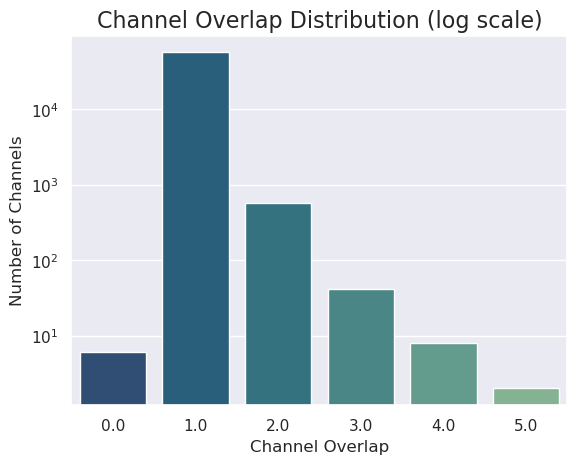

In [120]:
ax = sns.countplot(x = 'ch_overlap', data = df_channels_eng, palette = palette)
ax.set_title("Channel Overlap Distribution (log scale)", fontsize = 16)
plt.ylabel("Number of Channels")
plt.xlabel("Channel Overlap")
plt.yscale('log')

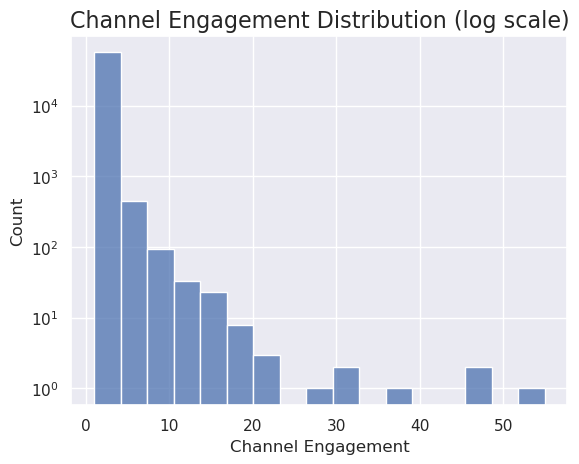

In [121]:
sns.histplot(data = df_relations, x = 'ch_engagement')
plt.title("Channel Engagement Distribution (log scale)", fontsize = 16)
plt.xlabel("Channel Engagement")
plt.yscale('log')

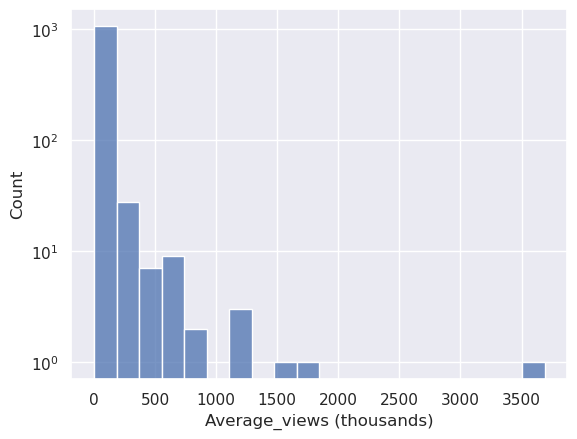

In [111]:

sns.histplot(data = df_influencers, x = 'Average_views (thousands)', bins = 20)
plt.yscale('log')

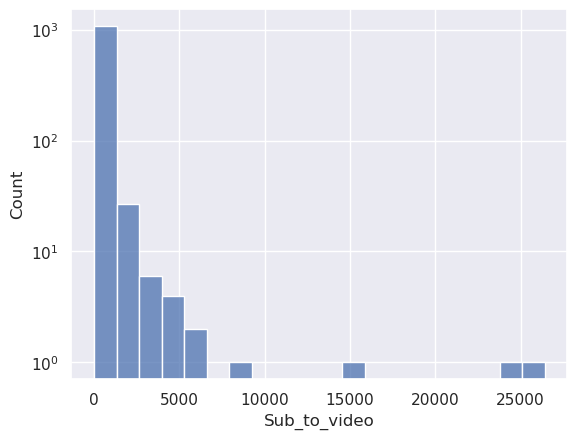

In [112]:

sns.histplot(data = df_influencers, x = 'Sub_to_video', bins = 20)
plt.yscale('log')

In [114]:
df_influencers.to_csv('influencers.csv')

In [116]:
df_influencers['ch_subscriberCount'].min()

1010

In [118]:
df_influencers

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Sub_to_video,ch_overlap,PR_score,degree,Average_views (thousands)
0,UC5Bnfg0KYC9cxlx8VlrlPuA,Perkz,"I'm Perkz, pro-player for Vitality League Of L...",2020-01-29T11:26:56.566427Z,4888171,63100,86,733.720930,0.0,NaN,(),56.839198
1,UC1gcUuLhyMCBkZSO-SeJVQg,Bo,"Zhou ""Bo"" Yang-Bo \n\n#VForVictory\n\nbo@surge...",2022-02-10T16:26:57.804829Z,1553243,17300,64,270.312500,0.0,0.000489,168,24.269422
2,UClBzs_otOTThoS-fIYr6woA,Jactroll,CZÓŁKO!\n\nJestem supportem w Vitality.Bee w l...,2015-10-13T06:49:04Z,1743993,25000,72,347.222222,0.0,0.002147,137,24.222125
3,UCRRfSRlDq2ma7xp_8HYvYeA,YamatoCannon,Email: Yamatocannon@surge.management,2008-04-06T17:30:33Z,13432348,74400,880,84.545455,1.0,0.179928,1177,15.264032
4,UCgjhed4ZWlmC25hS4Sgs7gw,Team Vitality,"Leading esports team in France, aiming to conq...",2015-12-09T13:36:53Z,56439072,343000,1107,309.846432,1.0,0.266180,1172,50.983805
...,...,...,...,...,...,...,...,...,...,...,...,...
1112,UCnYPDSej1npW6HQbK00X_-Q,Lady of the dreams,Hey guys if are interested in edits so then yo...,2021-01-18T17:50:02.906488Z,543710,2050,214,9.579439,1.0,0.000003,1,2.540701
1113,UCzLz5YaJDI9mo6w6Av5fehg,Cpl Son,New video every day!!!,2012-03-23T01:04:06Z,3691330,1740,1,1740.000000,1.0,0.000003,1,3691.330000
1114,UCXU8UrZcu4XwOBp-urv2ckw,BlueJoobYT,24 and best IGL in APEXM. Playing Farlight 84 ...,2017-12-07T11:11:36Z,119681,1060,450,2.355556,1.0,0.000003,1,0.265958
1115,UCQdLM7Lf8vTstMEQrLvOXQg,Dragon Ball 😈,Dragon Ball z \nAnime edit 🤩\nVideo Editor 🎬\n...,2022-09-03T20:16:46.965563Z,36098,1010,246,4.105691,1.0,0.000003,1,0.146740


## NETWORK GRAPH

In [67]:
min_videos = 10 # These parameters are arbitrary
min_subs = 10000

influencers = df_channels_all[(df_channels_all['ch_viewCount'] > min_videos) & (df_channels_all['ch_subscriberCount'] > min_subs)]['ch_id']

In [68]:
df_relations_inf = df_relations[(df_relations['ch_id'].isin(influencers)) & (df_relations['commenter_id'].isin(influencers))]

In [69]:
# Removing self-commenting
df_relations_inf = df_relations_inf[df_relations_inf['ch_id'] != df_relations_inf['commenter_id']]

In [70]:
channel_list = list(set(df_relations_inf[['commenter_id', 'ch_id']].stack().to_list()))

In [71]:
len(channel_list)

190

In [72]:
# Mapping channel ids to a numeric value (makes graph easier)
id_ch_dct = {i:v for i,v in enumerate(channel_list)}
ch_id_dct = {v:i for i,v in enumerate(channel_list)}

In [73]:
df_relations_inf['ch_num'] = df_relations_inf['ch_id'].map(ch_id_dct)
df_relations_inf['commenter_num'] = df_relations_inf['commenter_id'].map(ch_id_dct)

In [74]:
# Creating a Network Graph

G2 = nx.from_pandas_edgelist(df_relations, source = 'commenter_id', target = 'ch_id', edge_attr = 'ch_engagement', create_using = nx.DiGraph)

In [75]:
G = nx.from_pandas_edgelist(df_relations_inf, source = 'commenter_num', target = 'ch_num', edge_attr = 'ch_engagement', create_using = nx.DiGraph)

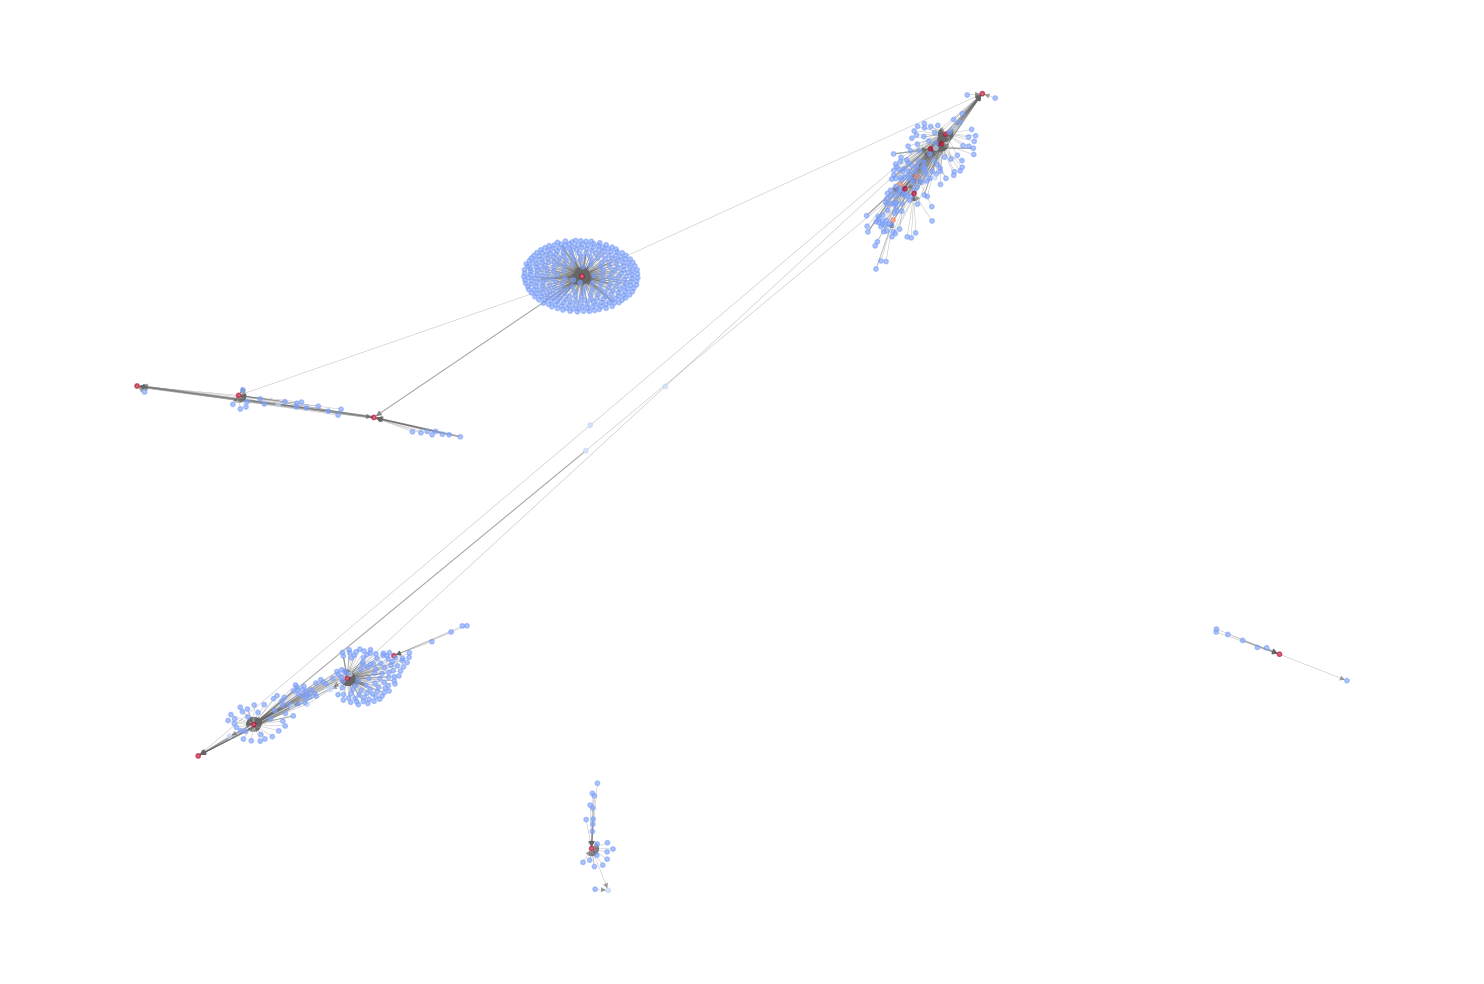

In [66]:
# fixing the size of the figure
plt.figure(figsize =(15, 10))
  
node_color = [G.degree(v) for v in G]
# node colour is a list of degrees of nodes
  
#node_size = [0.0005 * nx.get_node_attributes(G, 'population')[v] for v in G]
# size of node is a list of population of cities
  
edge_width = [0.25 * G[u][v]['ch_engagement'] for u, v in G.edges()]
# width of edge is a list of weight of edges
  
nx.draw_networkx(G, 
                 alpha = 0.6, node_size = 10,
                 with_labels = False, width = edge_width,
                 arrowsize = 8, node_color = node_color,
                 edge_color ='0.4', cmap = plt.cm.coolwarm,
                 vmin = 0, vmax = 5,
                 pos = nx.spring_layout(G))
  
plt.axis('off')
plt.tight_layout();

In [63]:
df_channels_inf = df_channels_all[df_channels_all['ch_id'].isin(channel_list)].reset_index(drop = True)

In [76]:
df_channels_inf

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount
0,UClBzs_otOTThoS-fIYr6woA,Jactroll,CZÓŁKO!\n\nJestem supportem w Vitality.Bee w l...,2015-10-13T06:49:04Z,1743993,25000,72
1,UCRRfSRlDq2ma7xp_8HYvYeA,YamatoCannon,Email: Yamatocannon@surge.management,2008-04-06T17:30:33Z,13432348,74400,880
2,UCgjhed4ZWlmC25hS4Sgs7gw,Team Vitality,"Leading esports team in France, aiming to conq...",2015-12-09T13:36:53Z,56439072,343000,1107
3,UCg187VQ-GhEuZoAkiX8rfhw,ZywOo,・CS:GO Professional Player for Vitality\n\n・My...,2019-10-11T05:10:05.567744Z,3981083,84000,182
4,UC_eAIxEDrIZYVWWdKsg_sqQ,apEXcsgo,► Professional CS:GO player for Team Vitality\...,2018-01-04T13:19:25Z,1835415,29100,146
...,...,...,...,...,...,...,...
185,UCF1kBr2iIztnVvRqqH83gtA,GoodGamer3000,"I make gaming videos; Let's plays, tutorials, ...",2015-01-20T00:51:16Z,6506605,12400,58
186,UC_xcGgU1zQV5nJEEQJWy1FA,mxtt,NaN,2014-06-30T23:49:13Z,905381,11300,56
187,UCQSpnDG3YsFNf5-qHocF-WQ,ThioJoe,"I make technology videos, including tech news,...",2009-02-05T22:32:40Z,229546712,2980000,829
188,UCz-hlzLKQ__1nKXarSedtQA,HardwareFR,"Salut, Je partage ma passion du Hardware avec ...",2016-09-03T19:19:06Z,2027073,11300,212


In [76]:
df_channels_inf['ch_num'] = df_channels_inf['ch_id'].map(ch_id_dct)

In [77]:
# We create a dict. to map channels with subscriber counts:

channels = df_channels_inf['ch_num']
subs = df_channels_inf['ch_subscriberCount']

sub_counts = {k:v for (k,v) in zip(channels, subs)}

In [78]:
for i in list(G.nodes()):
    G.nodes[i]['sub_count'] = sub_counts[i]

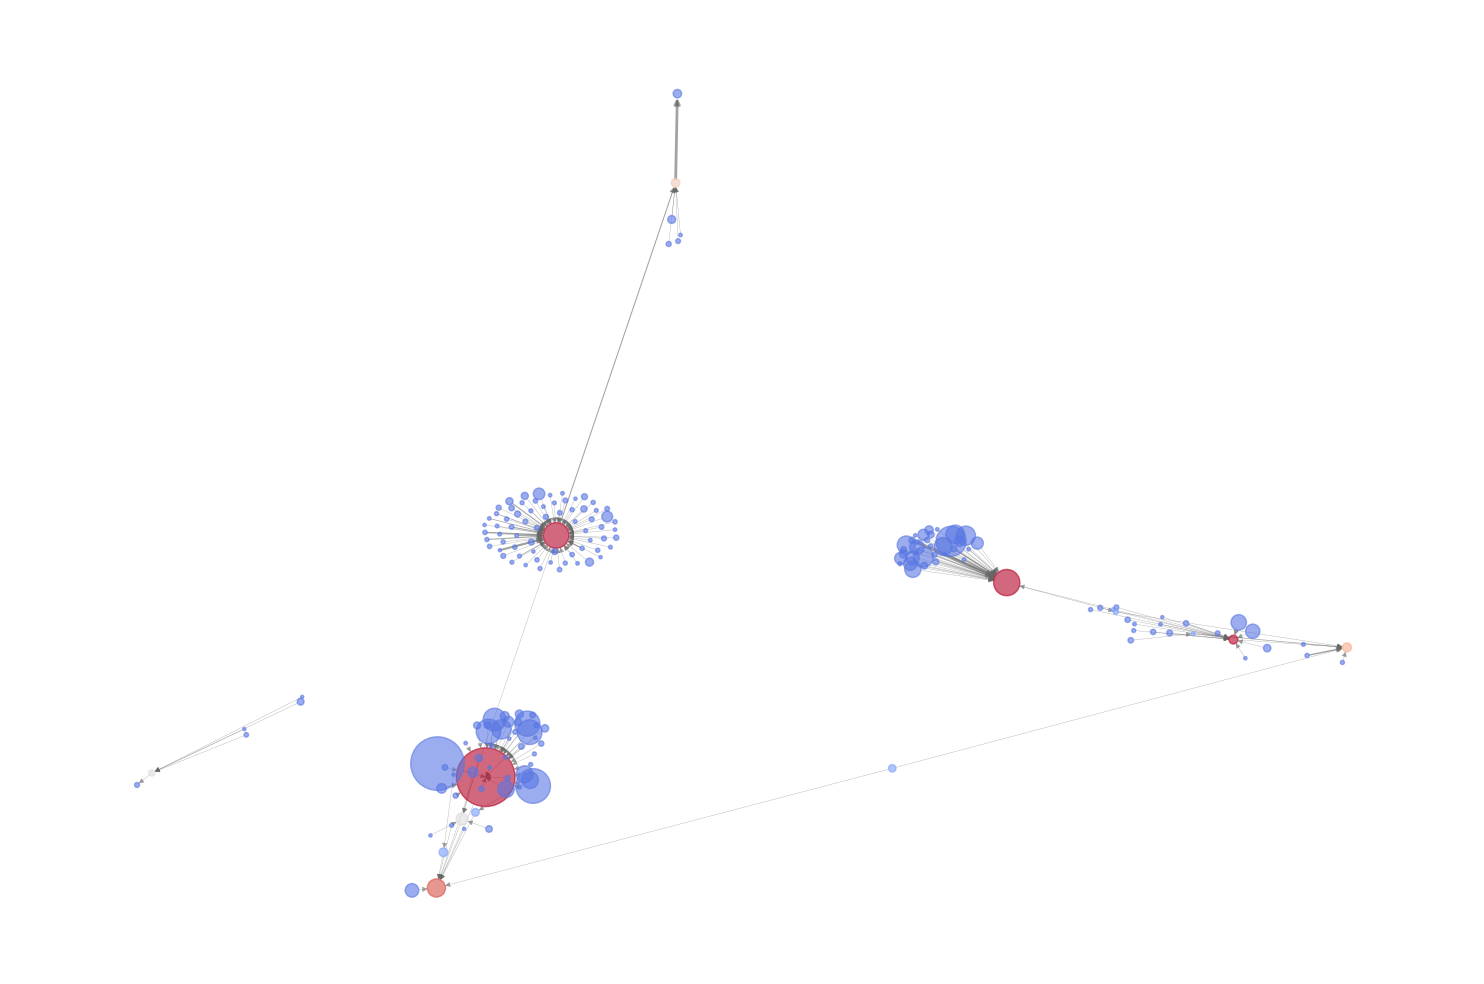

In [80]:
# fixing the size of the figure
plt.figure(figsize =(15, 10))
  
node_color = [G.degree(v) for v in G]
# node colour is a list of degrees of nodes
  
node_size = [0.0005 * nx.get_node_attributes(G, 'sub_count')[v] for v in G]
# size of node is a list of population of cities
  
edge_width = [0.25 * G[u][v]['ch_engagement'] for u, v in G.edges()]
# width of edge is a list of weight of edges
  
nx.draw_networkx(G, 
                 alpha = 0.6, node_size = node_size, 
                 with_labels = False, width = edge_width,
                 arrowsize = 8, node_color = node_color,
                 edge_color ='0.4', cmap = plt.cm.coolwarm,
                 vmin = 0, vmax = 10,
                 pos = nx.spring_layout(G))
  
plt.axis('off')
plt.tight_layout();

In [81]:
# Calculating Centrality (Degree & PageRank Algorithm):

deg = nx.degree(G2)
#print(deg)
pr=nx.pagerank(G2)
#print(pr)

In [82]:
df_influencers['PR_score'] = df_influencers['ch_id'].map(pr)
df_influencers['degree'] = df_influencers['ch_id'].map(deg)
df_influencers['Average_views (thousands)'] = df_influencers['Average_views']/1000
df_influencers = df_influencers.drop(columns = ['Average_views'])

In [83]:
# Obtaining the top 20 channels in terms of PageRank score:

df_influencers.sort_values('PR_score', ascending = False).head(20).to_csv('top20.csv')

In [84]:
df_influencers.sort_values('PR_score', ascending = False).head(20)

,ch_id,ch_title,ch_description,ch_created,ch_viewCount,ch_subscriberCount,ch_videoCount,Sub_to_video,ch_overlap,PR_score,degree,Average_views (thousands)
4,UCgjhed4ZWlmC25hS4Sgs7gw,Team Vitality,"Leading esports team in France, aiming to conq...",2015-12-09T13:36:53Z,56439072,343000,1107,309.846432,1.0,0.266180,1172,50.983805
3,UCRRfSRlDq2ma7xp_8HYvYeA,YamatoCannon,Email: Yamatocannon@surge.management,2008-04-06T17:30:33Z,13432348,74400,880,84.545455,1.0,0.179928,1177,15.264032
5,UCg187VQ-GhEuZoAkiX8rfhw,ZywOo,・CS:GO Professional Player for Vitality\n\n・My...,2019-10-11T05:10:05.567744Z,3981083,84000,182,461.538462,1.0,0.119489,556,21.874082
58,UCaafcCrTB2_rWT4QmGoPasQ,Billyhan_,Just sharing my relatable anime content with y...,2019-10-09T17:40:45Z,432266578,678000,613,1106.035889,4.0,0.074510,25489,705.165706
15,UCz35bqLIv_RNGnMZ9c5LcDQ,Psychopathic Poro,I will make League of Legends fun or die tryin...,2016-05-09T18:20:00Z,530743,6620,100,66.200000,2.0,0.053739,956,5.307430
33,UCRHXUZ0BxbkU2MYZgsuFgkQ,The Spiffing Brit,Hey all welcome to the channel\n\nContent is m...,2013-10-10T19:06:47Z,713578518,3570000,576,6197.916667,2.0,0.043205,10400,1238.851594
47,UC1jKNEbPEc8K9pAuVUS_tAQ,G2 League of Legends,Make sure to subscribe to never miss a video! ...,2022-04-25T09:45:41.553595Z,16319460,76600,237,323.206751,3.0,0.027992,1478,68.858481
14,UCWGqXeJaB5s1vNmAmyRJTTA,CAZE GAMING,I make counter strike content,2013-11-11T02:08:30Z,74236699,81000,676,119.822485,2.0,0.026632,6485,109.817602
64,UCGntRpUdlsUG0tcvj2zIAIQ,FranzJ,https://twitch.tv/FranzJ\nhttps://twitter.com/...,2013-05-03T22:28:56Z,170246636,716000,277,2584.837545,2.0,0.018784,4571,614.608794
6,UC_eAIxEDrIZYVWWdKsg_sqQ,apEXcsgo,► Professional CS:GO player for Team Vitality\...,2018-01-04T13:19:25Z,1835415,29100,146,199.315068,2.0,0.016977,91,12.571336


## END

## Clustering (Exploratory)

In [85]:
# K-means: Based on edges only:

edges = list(G.edges())
node_labels = list(G.nodes())
num_nodes = G.number_of_nodes()

edge_matrix = np.zeros((num_nodes, num_nodes))

for edge in edges:
    source = edge[0]
    target = edge[1]
    edge_matrix[source][target] = 1

In [86]:
edge_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
k_clusters = 5
model = cluster.KMeans(n_clusters=k_clusters, n_init=200)
model.fit(edge_matrix)

KMeans(n_clusters=5, n_init=200)

In [94]:
def draw_communities(G, communities, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    communities : list
        A list where the position is the channel and the value at the position is the channel's community.
        E.g. `print(community[8]) --> 1` means that channel #8 is a part of community 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    community_dict = defaultdict(list)
    for channel, community in enumerate(communities):
        community_dict[community].append(channel)
    
    # Normalize number of clubs for choosing a color
    norm = cm.colors.Normalize(vmin=0, vmax=len(community_dict.keys()))
    
    for community, channels in community_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=channels,
                               node_color=cm.jet(norm(community)),
                               node_size=100,
                               alpha=0.6,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("eSports Youtube Communities")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [89]:
pos = nx.spring_layout(G)

In [90]:
community_dict = defaultdict(list)
for channel, community in enumerate(model.labels_):
    community_dict[community].append(channel)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

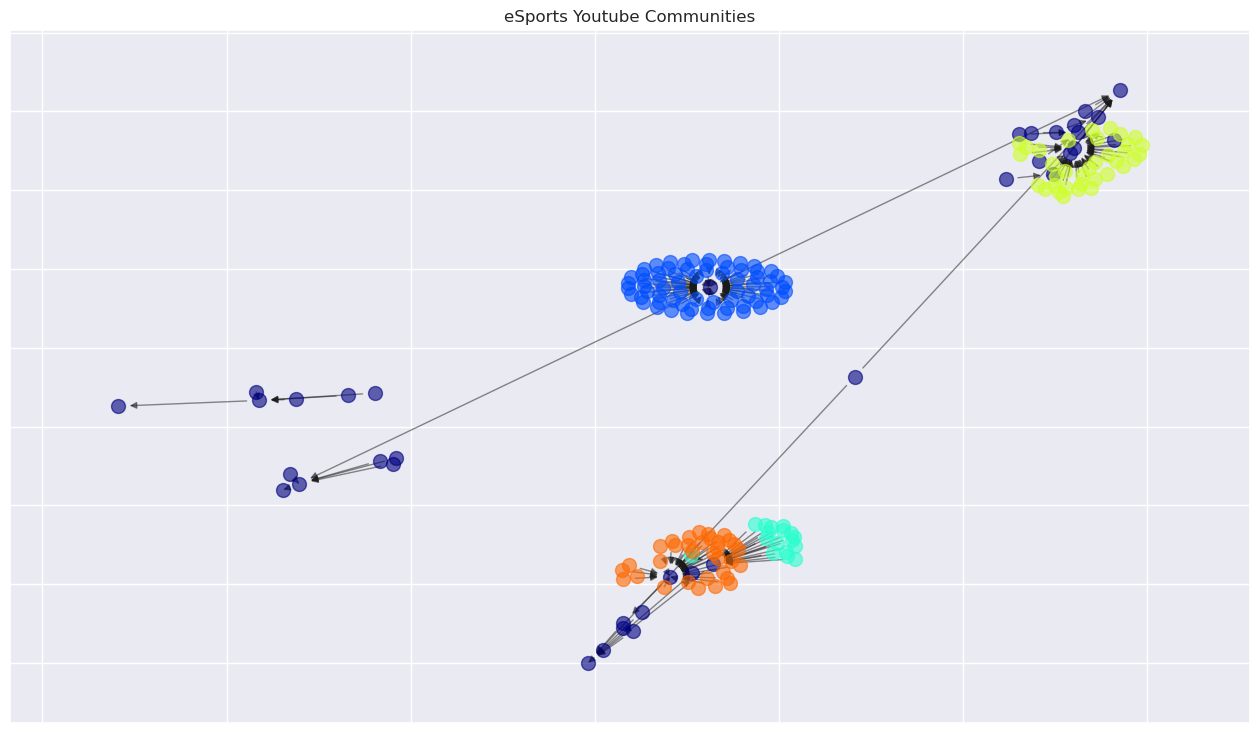

In [95]:
draw_communities(G, model.labels_, pos)